# Results analysis

#### dataset Loading and options 

In [6]:
from datasets import Dataset,load_dataset
import pandas as pd
import seaborn as sb

#dataset_split_name ="simpleLLM_benchmark_llama3.18binstant_pk_1_t_0.7" 
#dataset_split_name ="simpleLLM_benchmark_llama3.370bversatile_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_deepseekr17b_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_mixtral8x7b32768_pk_1_t_0.7" 
dataset_split_name = "simpleLLM_benchmark_deepseekr1distillllama70b_pk_1_t_0.7"
dataset_split = [dataset_split_name][0]

dataset = load_dataset("CharlyR/varbench-evaluation", dataset_split, split="tikz")
import os

result_path = os.path.join("results",dataset_split_name)
not os.path.exists("results/"+dataset_split_name) and os.mkdir("results/"+dataset_split_name)


Generating tikz split: 100%|██████████| 50/50 [00:00<00:00, 6261.65 examples/s]


In [21]:
dataset

Dataset({
    features: ['id', 'code', 'instruction', 'result_description', 'difficulty', 'patch', 'code_solution', 'image_solution', 'image_input', 'original_predictions', 'predictions', 'image_result_indexes', 'images_result', 'parsing_score', 'compiling_score', 'predictions_patches', 'LPIPSMetric', 'TERPatchMetric', 'MSSSIMMetric', 'ChrfMetric', 'BleuMetric', 'PSNRMetric', 'ClipImageMetric', 'MSEMetric', 'ChrfPatchMetric', 'TERMetric', 'BleuPatchMetric', 'LineMetric', 'PatchMetric', 'ClipTextMetric', 'FeatureMatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric'],
    num_rows: 50
})

## Best prediction computation

---
Best prediction is computed but not used for now, passk list is flattened later and metrics computed on all of them

In [13]:
from results_utils import MetricPolicy
import pandas as pd

computed_metrics_names = [
    metric_name
    for metric_name in dataset.column_names
    if metric_name.endswith("Metric")
]


# each metric is computed on list of predictions of length pass@k, and yields a list of list of result of the same length.
# from that list[list[float]](the results), we get the best result according to a certain policy(here the arithmetic mean)
subset = dataset.map(
    MetricPolicy.compute_best_prediction,
    fn_kwargs={"computed_metrics_names": computed_metrics_names},
)

scores = {
    metric_name: sum(subset[f"best_{metric_name}"]) / len(subset)
    for metric_name in computed_metrics_names
}
scores["var_score"] = sum(subset["var_score"]) / len(subset)
print(scores)#average of each best predicted score => NOTE: For all the instances where nothing compile, every best score is put to zero, reducing the other scores by a lot
result_df:pd.DataFrame = subset.to_pandas()

{'LPIPSMetric': 89.02217094421387, 'TERPatchMetric': 57.33802009582519, 'MSSSIMMetric': 83.63620241165161, 'ChrfMetric': 94.10237152099609, 'BleuMetric': 92.10838333129882, 'PSNRMetric': 45.2566332244873, 'ClipImageMetric': 94.7809051513672, 'MSEMetric': 95.02886596679687, 'ChrfPatchMetric': 41.58386889457702, 'TERMetric': 91.3650765991211, 'BleuPatchMetric': 23.990739009678364, 'LineMetric': 39.333333282470704, 'PatchMetric': 6.0, 'ClipTextMetric': 24.516606407165526, 'FeatureMatchMetric': 65.88787364959717, 'CrystalBleuPatchMetric': 23.341563178002833, 'CrystalBleuMetric': 90.85077224731445, 'var_score': 62.24372858320966}


In [18]:
result_df

,id,code,instruction,result_description,difficulty,patch,code_solution,image_solution,image_input,original_predictions,...,best_MSEMetric,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_ClipTextMetric,best_FeatureMatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric
0,donkey_higher_mane,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the mane of the donkey go upward a little...,A donkey with a high mane over its head,hard,"@@ -61,2 +61,2 @@\n- to [bend left] ++( 16, ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\n\n```\n\documentclass[tikz,border=5]{standa...",...,99.803001,5.957026,97.832817,0.213829,0.000000,0.0,23.523579,58.441559,0.222529,95.861595
1,chimpanzee_squint_crosseyes,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the eyes of the chimpanzee crossed, by ma...",A crossed-eyes chimpanzee,medium,"@@ -29,2 +29,4 @@\n-\foreach \i in {-1,1}- \f...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\n\n```\n\documentclass[tikz,border=5]{standa...",...,99.020058,26.908844,89.705879,4.481031,0.000000,0.0,27.789425,72.972977,3.460161,87.258995
2,bee_red_stripes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the color of the stripes to red,A bee with red stripes,easy,"@@ -25,2 +25,2 @@\n- on left= {colors alias={...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to figure out how to...",...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,27.442711,100.000000,100.000000,100.000000
3,shark_no_teeth,"\documentclass[tikz,border=5]{standalone}\n\us...",Remove the teeth of the shark,A shark with no teeth,easy,"@@ -7,6 +6,0 @@\n-\fill [BlueGrey200]- (2,16....","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to figure out how to...",...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,24.728065,100.000000,100.000000,100.000000
4,shark_other_set_pectoral_fin,"\documentclass[tikz,border=5]{standalone}\n\us...","Add another set of pectoral fin to the shark, ...",A shark with two sets of pectoral fins,hard,"@@ -16,0 +17,6 @@\n+\fill [BlueGrey700] (11,10...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to add another set o...",...,99.829895,38.496620,90.410957,7.212049,50.000000,0.0,26.854486,72.580643,5.684877,86.406158
5,dog_red_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the colors of the dog's eyes to red,A dog with red eyes,easy,"@@ -51 +51 @@\n- \fill [BlueGrey900] (56, 0) ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to change the colors...",...,99.684784,79.935883,98.795181,47.881420,100.000000,0.0,25.681784,75.806450,44.322075,97.431473
6,monkey_sad,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the monkey sad, by turning the shape of i...","A sad monkey, with its a downturned mouth",easy,"@@ -48,2 +48 @@\n- (-96,-72) arc (180:360:96 ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nAlright, so I need to figure out how...",...,96.558571,69.902130,98.461540,38.391098,100.000000,0.0,26.471395,20.000000,37.670467,96.171257
7,squid_bigger_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the eyes of the squid bigger,A squid w

## Pre-Filtering

In [19]:
# filtering by having a result
filtered_df = result_df[result_df["index_best_prediction"] != -1]

# ordering by text metrics
text_metrics = [
    metric_name
    for metric_name in computed_metrics_names
    if any((substring in metric_name) for substring in ["TER", "Line", "Bleu", "Chrf","Patch"])
]
other_metrics = list(set(computed_metrics_names) - set(text_metrics))
ordered_metrics = ["best_"+metric for metric in (text_metrics + other_metrics)]
print(text_metrics + other_metrics)

filtered_df = filtered_df[ordered_metrics + ["id", "difficulty"]]
filtered_df

['TERPatchMetric', 'ChrfMetric', 'BleuMetric', 'ChrfPatchMetric', 'TERMetric', 'BleuPatchMetric', 'LineMetric', 'PatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric', 'ClipTextMetric', 'PSNRMetric', 'FeatureMatchMetric', 'LPIPSMetric', 'MSSSIMMetric', 'MSEMetric', 'ClipImageMetric']


,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric,id,difficulty
0,51.079136,98.826576,96.998154,5.957026,97.832817,0.213829,0.000000,0.0,0.222529,95.861595,23.523579,44.214489,58.441559,97.895119,96.640633,99.803001,99.736710,donkey_higher_mane,hard
1,51.785713,95.967018,88.396996,26.908844,89.705879,4.481031,0.000000,0.0,3.460161,87.258995,27.789425,42.291893,72.972977,94.017708,88.620117,99.020058,97.421913,chimpanzee_squint_crosseyes,medium
2,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,27.442711,100.000000,100.000000,100.000000,100.000000,100.000000,99.999985,bee_red_stripes,easy
3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,24.728065,100.000000,100.000000,100.000000,100.000000,100.000000,99.999992,shark_no_teeth,easy
4,59.183674,92.346718,88.040398,38.496620,90.410957,7.212049,50.000000,0.0,5.684877,86.406158,26.854486,45.872265,72.580643,93.984505,94.136856,99.829895,99.455841,shark_other_set_pectoral_fin,hard
5,65.384613,98.676598,98.713654,79.935883,98.795181,47.881420,100.000000,0.0,44.322075,97.431473,25.681784,45.557770,75.806450,96.446434,97.515823,99.684784,98.521736,dog_red_eyes,easy
6,50.000000,99.048004,97.251343,69.902130,98.461540,38.391098,100.000000,0.0,37.670467,96.171257,26.471395,36.443939,20.000000,85.454491,71.228500,96.558571,91.097893,monkey_sad,easy
7,70.491806,99.395744,98.272636,66.184586,98.755188,51.410393,0.000000,0.0,48.667797,97.440536,27.036644,44.813560,69.879517,98.728035,96.597862,99.423752,99.792595,squid_bigger_eyes,medium
8,71.014496,98.385330,96.301048,88.661110,97.237572,63.917538,100.000000,0.0,63.498093,93.075272,26.923786,37.699333,54.666668,92.299774,79.395256,99.305779,98.932846,chimpanzee_blue_fur,easy
9,50.000000,98.255898,96.509911,14.199751,97.476341,0.468318,0.000000,0.0,0.405015,94.417747,26.360241,45.166931,73.255814,98.353622,97.802528,99.910728,99.735619,cow_longer_horns,medium


## Passing rate

In [26]:
def compute_pass(row):
    
    row["pass"] = row["compiling_score"]!=0
    return row
pass_dataset = result_df[["difficulty","id","compiling_score"]].apply(compute_pass,axis=1)


In [27]:
pass_dataset

,difficulty,id,compiling_score,pass
0,hard,donkey_higher_mane,1.0,True
1,medium,chimpanzee_squint_crosseyes,1.0,True
2,easy,bee_red_stripes,1.0,True
3,easy,shark_no_teeth,1.0,True
4,hard,shark_other_set_pectoral_fin,1.0,True
5,easy,dog_red_eyes,1.0,True
6,easy,monkey_sad,1.0,True
7,medium,squid_bigger_eyes,1.0,True
8,easy,chimpanzee_blue_fur,1.0,True
9,medium,cow_longer_horns,1.0,True


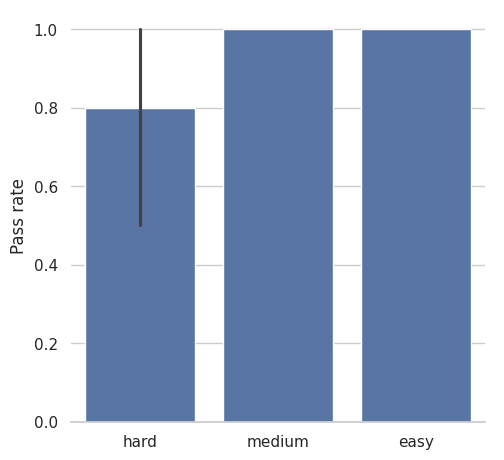

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=pass_dataset, kind="bar",
    x="difficulty", y="pass"
)
g.despine(left=True)
g.set_axis_labels("", "Pass rate")
g.legend.set_title("")
plt.savefig(os.path.join(result_path,"pass_rate_difficulty.png"), dpi=300, bbox_inches="tight")


## no subcategories

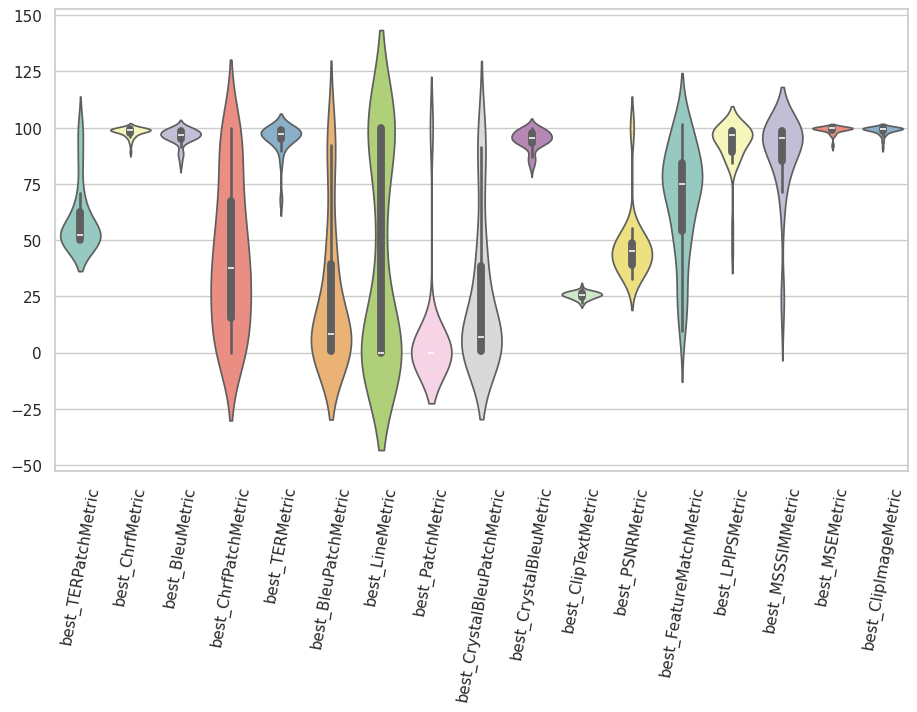

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation=80)

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=filtered_df, palette="Set3")#,order=order)
plt.savefig(os.path.join(result_path,"violin_all_metrics.png"), dpi=300, bbox_inches="tight")


In [33]:
filtered_df[filtered_df.columns.difference(['difficulty','id'])].mean(axis=0)

best_BleuMetric                95.946233
best_BleuPatchMetric           24.990353
best_ChrfMetric                98.023304
best_ChrfPatchMetric           43.316530
best_ClipImageMetric           98.730110
best_ClipTextMetric            25.538132
best_CrystalBleuMetric         94.636221
best_CrystalBleuPatchMetric    24.314128
best_FeatureMatchMetric        68.633202
best_LPIPSMetric               92.731428
best_LineMetric                40.972222
best_MSEMetric                 98.988402
best_MSSSIMMetric              87.121044
best_PSNRMetric                47.142326
best_PatchMetric                6.250000
best_TERMetric                 95.171955
best_TERPatchMetric            59.727104
dtype: float64

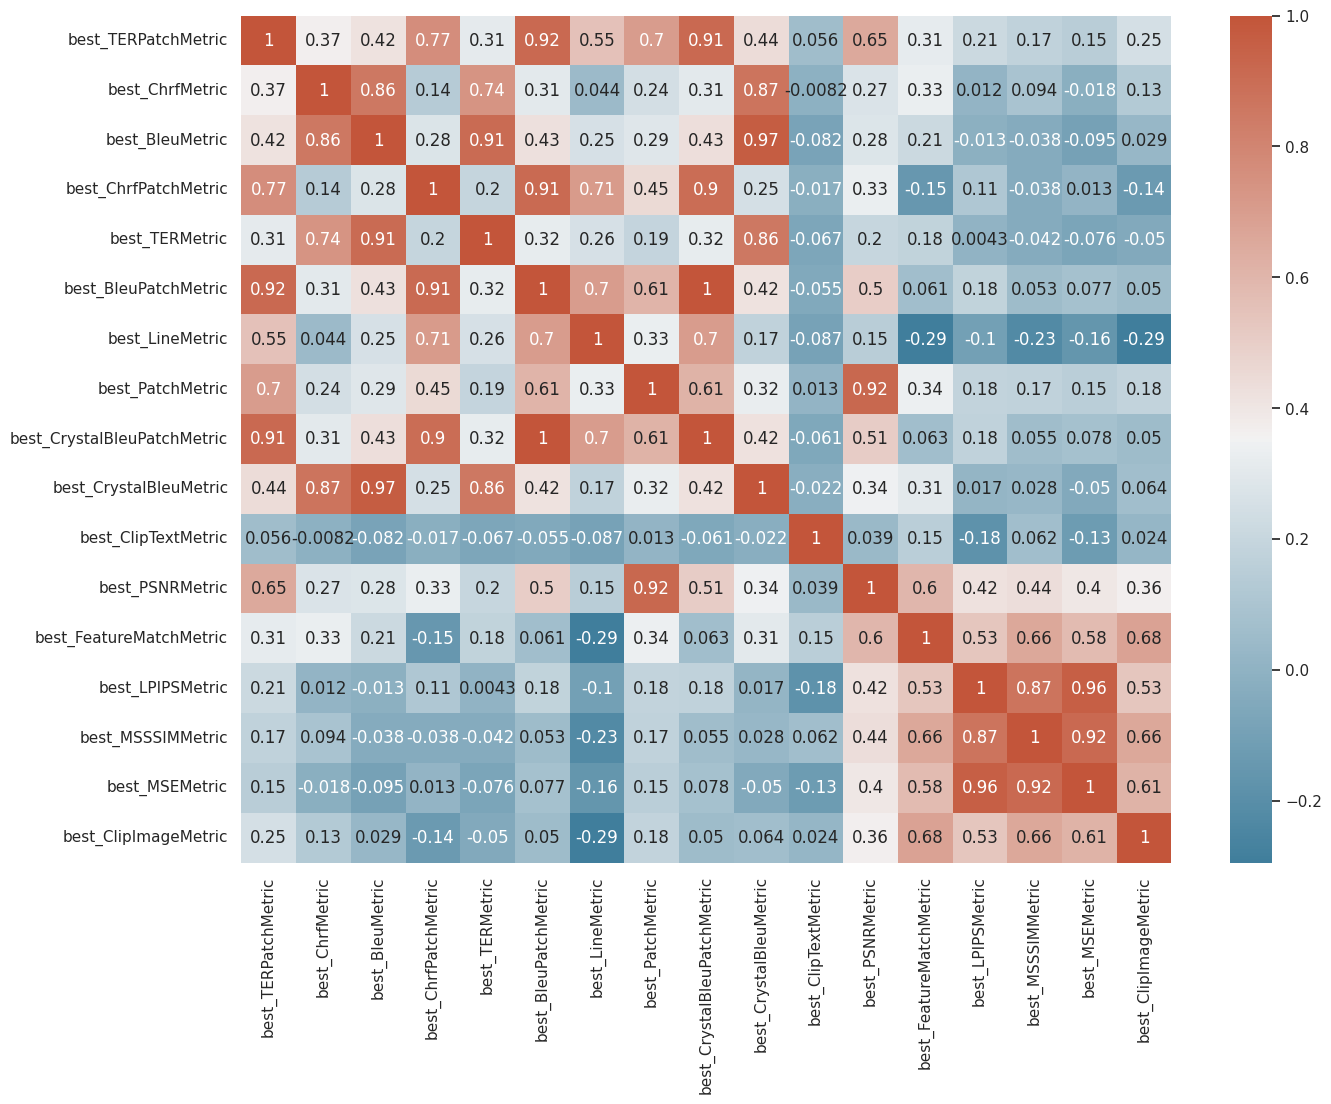

In [ ]:
#TODO move that to metricbench and measure the correlation on the exploded dataset
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = filtered_df.select_dtypes(["int","float"]).corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, annot=True)
plt.savefig(os.path.join(result_path,"heatmap_correlation.png"), dpi=300, bbox_inches="tight")


## filtered by difficulty

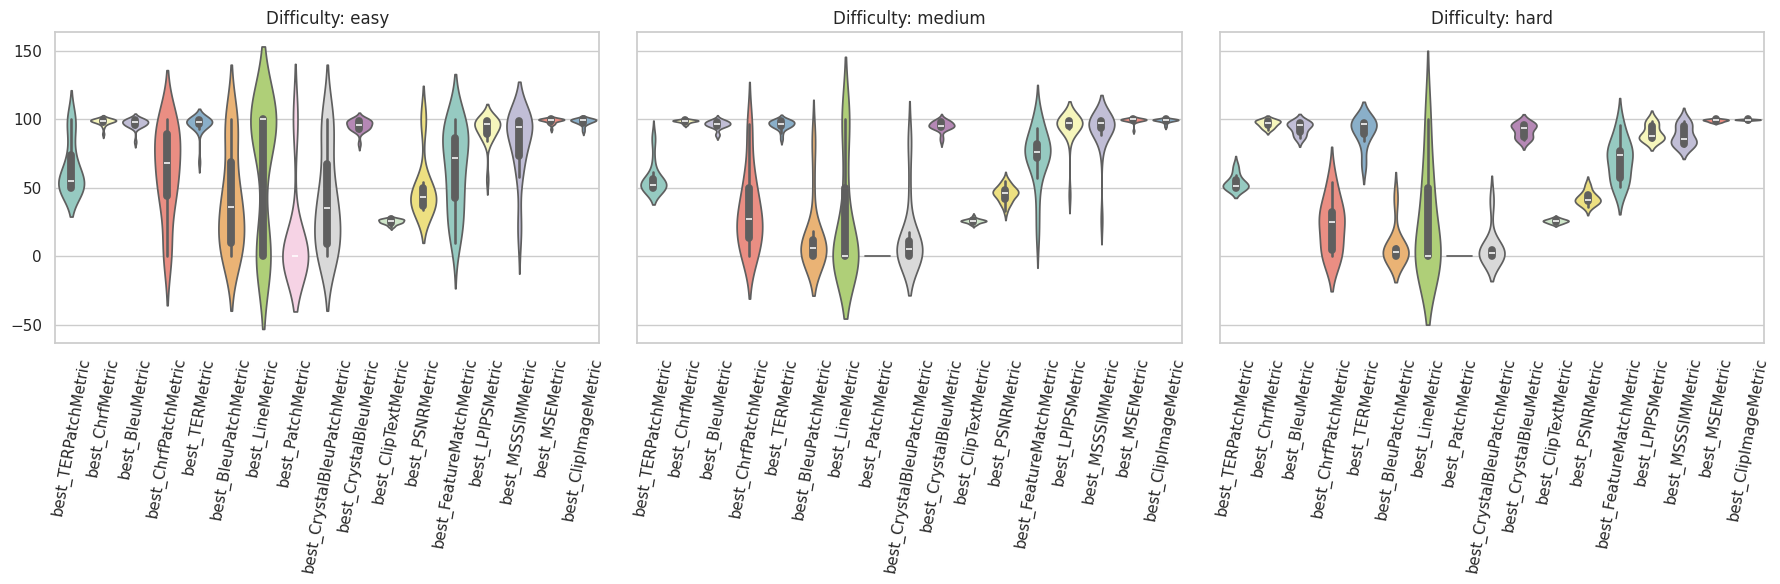

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_difficulty = filtered_df.drop("id",axis=1)
df_difficulty

sns.set_theme(style="whitegrid")

# Assuming 'difficulty' column exists in the DataFrame
difficulties = ['easy', 'medium', 'hard']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots

for i, difficulty in enumerate(difficulties):
    sns.violinplot(
        data=df_difficulty[df_difficulty['difficulty'] == difficulty], 
        ax=axes[i], 
        palette="Set3"
    )
    axes[i].set_title(f'Difficulty: {difficulty}')
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.savefig(os.path.join(result_path,"violin_by_difficulty.png"), dpi=300, bbox_inches="tight")
plt.show()


In [36]:
df_difficulty['difficulty'] = pd.Categorical(df_difficulty['difficulty'], categories=['easy', 'medium', 'hard'], ordered=True)
averages = df_difficulty.groupby('difficulty',observed=True).mean()
averages.to_csv(os.path.join(result_path,"avg_by_difficulty.csv"))

averages

,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric
difficulty,,,,,,,,,,,,,,,,,
easy,64.948756,98.150833,96.817546,62.010878,96.149648,41.532595,63.333333,15.0,40.722539,95.473431,25.288140,50.616946,63.652586,92.466805,82.164679,98.778415,98.241753
medium,56.774160,98.409003,96.047723,33.012655,95.895277,15.409163,25.000000,0.0,14.864437,94.975487,25.737148,45.559931,72.896435,94.001361,91.691061,99.194831,98.921930
hard,54.055336,96.740232,93.514223,22.340346,90.919416,7.587724,25.000000,0.0,6.917331,91.695032,25.665569,42.411765,70.426659,90.218153,88.086913,98.997297,99.471452


In [37]:
med = df_difficulty.groupby('difficulty',observed=True).median()
med.to_csv(os.path.join(result_path,"med_by_difficulty.csv"))
med

,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric
difficulty,,,,,,,,,,,,,,,,,
easy,55.206131,98.688534,97.642330,68.303440,97.980495,36.077906,100.0,0.0,35.191494,96.084282,25.495741,43.489872,71.847828,96.134583,94.016445,99.675064,99.082848
medium,51.892857,98.720757,96.585487,27.420190,96.314323,5.761007,0.0,0.0,4.971301,94.762348,25.730845,45.908142,75.705559,97.499889,97.018970,99.771275,99.421360
hard,51.581234,97.267063,95.445538,25.110055,96.224255,3.054114,0.0,0.0,2.345994,93.476200,25.718040,40.667475,73.914085,87.466637,85.728691,99.117390,99.593430
